# Preparação do estado de depolarizing

In [19]:
from sympy import cos, sin, sqrt, pi, Matrix, Symbol, exp, print_latex, simplify
#from sympy.physics.quantum import TensorProduct, Dagger
import numpy as np
from numpy import linspace
#import matplotlib.pyplot as plt
#import math
from theoric.tools import *
#import torch
from torch import tensor

theta = Symbol('theta',real=True)
phi = Symbol('phi',real=True)
gamma = Symbol('gamma',real=True, positive=True)
p = Symbol('p',real=True, positive=True)



def calculated_rho_AB(theta, phi, p):
    state = Matrix([[(sqrt(1-3*p/4)*cos(theta/2)),
                    (sqrt(p/4)*exp(1j*phi)*sin(theta/2)),
                    -1j*(sqrt(p/4)*exp(1j*phi)*sin(theta/2)),
                    (sqrt(p/4)*cos(theta/2)),
                    (sqrt(1-3*p/4)*exp(1j*phi)*sin(theta/2)),
                    (sqrt(p/4)*cos(theta/2)),
                    (1j*sqrt(p/4)*cos(theta/2)),
                    0]])
    M_numpy = np.array(state.tolist(), dtype=np.complex64)
    return M_numpy
    return state

def get_target_op(func_estado):
    state1 = simplify(func_estado)
    state2 = np.zeros(8,dtype=complex)
    aux = 0
    for i in state1[0]:
        state2[aux] = i
        aux += 1
    target_op = np.outer(state2.conj(), state2)
    target_op = tensor(target_op)
    return target_op

#state = calculated_rho_AB(theta, phi, p)
state = calculated_rho_AB(pi/2, 0, 0)
state

array([[0.70710677+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.70710677+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j]],
      dtype=complex64)

In [20]:
a = get_target_op(calculated_rho_AB(pi/2, 0, 1))
a


tensor([[ 0.1250+0.0000j,  0.1250+0.0000j,  0.0000-0.1250j,  0.1250+0.0000j,
          0.1250+0.0000j,  0.1250+0.0000j,  0.0000+0.1250j,  0.0000+0.0000j],
        [ 0.1250+0.0000j,  0.1250+0.0000j,  0.0000-0.1250j,  0.1250+0.0000j,
          0.1250+0.0000j,  0.1250+0.0000j,  0.0000+0.1250j,  0.0000+0.0000j],
        [ 0.0000+0.1250j,  0.0000+0.1250j,  0.1250+0.0000j,  0.0000+0.1250j,
          0.0000+0.1250j,  0.0000+0.1250j, -0.1250+0.0000j,  0.0000+0.0000j],
        [ 0.1250+0.0000j,  0.1250+0.0000j,  0.0000-0.1250j,  0.1250+0.0000j,
          0.1250+0.0000j,  0.1250+0.0000j,  0.0000+0.1250j,  0.0000+0.0000j],
        [ 0.1250+0.0000j,  0.1250+0.0000j,  0.0000-0.1250j,  0.1250+0.0000j,
          0.1250+0.0000j,  0.1250+0.0000j,  0.0000+0.1250j,  0.0000+0.0000j],
        [ 0.1250+0.0000j,  0.1250+0.0000j,  0.0000-0.1250j,  0.1250+0.0000j,
          0.1250+0.0000j,  0.1250+0.0000j,  0.0000+0.1250j,  0.0000+0.0000j],
        [ 0.0000-0.1250j,  0.0000-0.1250j, -0.1250-0.0000j,  0.0000-0.

In [23]:
'''                                  ReadMe                                                      '''
'''# Nessa célula vamos apenas mudar a função geradora do estado a ser preparado                 '''
'''# Basta alterar a função que gera o estado, nesse caso target_op = init_state_ref(n_qubits, p)'''

from src.vqa_tools import general_vqacircuit_penny 
from src.generalize import *
from torch import tensor
from numpy import sin,cos,sqrt,outer,zeros, pi
import cmath
import pickle
from theoric.bf_theoric import *

def run_calcs(list_p, epochs):
    coerencias_R = []
    coerencias_L = []
    pretrain = True
    save = True
    count = 0
    n_qubits = 3
    depht = 4
    _, params, _, _ = start_things(n_qubits, depht)
    for p in list_p:
        print(f'{count} de {len(list_p)}')
        count += 1
        circuit, _ = general_vqacircuit_penny(params, n_qubits, depht)

        # defina o estado a ser preparado abaixo
        #------------------------------------------------------------
        #target_op = bpf(pi/2, 0, p)
        target_op = get_target_op(calculated_rho_AB(pi/2, 0, p))
        #------------------------------------------------------------
    
        qc, qr, params = optmize(epochs, n_qubits, circuit, params, target_op, pretrain, 50)
        pretrain = False
        rho = tomograph(qc, qr)
        print(rho)
        coerencias_L, coerencias_R = results(rho, coerencias_R, coerencias_L)
    if save:
        mylist = [coerencias_L, coerencias_R]
        with open('data/d/d-coherences.pkl', 'wb') as f:
            pickle.dump(mylist, f)
        with open('data/d/d-best_params.pkl', 'wb') as f:
            pickle.dump(params, f)
    plot_theoric_bf(list_p)
    plots(list_p, coerencias_R, coerencias_L)
    #save = [list_p, coerencias_R, coerencias_L]
    #with open('data/BPFlist_p-coerencias_R-coerencias_L.pkl', 'wb') as f:
    #    pickle.dump(save, f)
    

0 de 21
[[ 0.50926037+0.j          0.49525323+0.01590597j -0.00340539+0.00293633j
   0.01266481+0.00214665j]
 [ 0.49525323-0.01590597j  0.48656084+0.j         -0.00510236+0.00067374j
   0.01131809-0.00095313j]
 [-0.00340539-0.00293633j -0.00510236-0.00067374j  0.00202022+0.j
   0.00174557+0.00048592j]
 [ 0.01266481-0.00214665j  0.01131809+0.00095313j  0.00174557-0.00048592j
   0.00215857+0.j        ]]
1 de 21
[[ 0.54197543+0.j          0.48737492+0.00263675j -0.0110992 -0.02713042j
   0.00706806+0.06025437j]
 [ 0.48737492-0.00263675j  0.44109607+0.j         -0.01280299-0.0236282j
   0.00561249+0.05475708j]
 [-0.0110992 +0.02713042j -0.01280299+0.0236282j   0.00822744+0.j
  -0.00421927-0.00045299j]
 [ 0.00706806-0.06025437j  0.00561249-0.05475708j -0.00421927+0.00045299j
   0.00870106+0.j        ]]
2 de 21
[[ 0.45820459+0.j          0.47300736+0.00456171j  0.02463204-0.10318221j
  -0.01944611+0.07854109j]
 [ 0.47300736-0.00456171j  0.49257765+0.j          0.02366972-0.10279972j
  -0.016

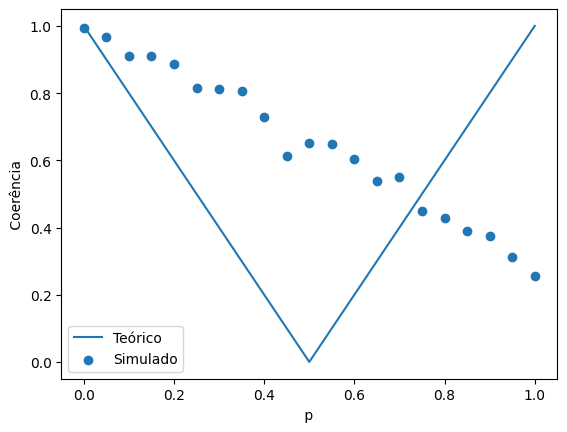

In [24]:
list_p = np.linspace(0,1,21)
run_calcs(list_p, 35)